In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
from heterogeneity_gym.hsp90 import hsp90_jax as hsp90
from heterogeneity_gym.rendering import _build_volumes
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp

In [3]:
model = hsp90.HSP90_Model(defocus_range=(1000, 2000))

In [37]:
latent_code = jnp.array([1, 4, 7, 10, 13, 15, 19])
poses = jnp.zeros((len(latent_code), 6))


poses = poses.at[:, 3].set(90.)
poses = poses.at[:, 4].set(90.)

images, structures, rotations, ctfs = model.render_images_from_latent(latent_code, poses=poses, noise_std=0)

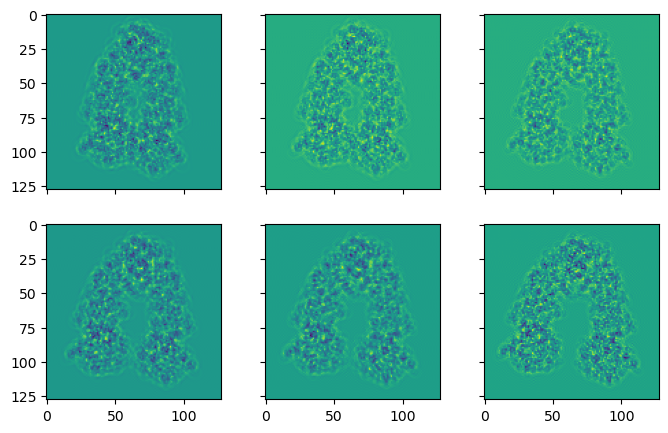

In [26]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8, 5))
axf = np.array(axes).ravel()

for i, ax in enumerate(axf):
    ax.imshow(images[i])

In [6]:
traj = hsp90._load_hsp90_traj()
atom_positions, identities = hsp90.get_atom_info_from_mdtraj(traj)

In [7]:
print(np.max(atom_positions[0], axis=0))

[66.19     53.281002 43.899002]


In [8]:
print(rotations)

[[-2.78892842  2.36972534  0.92133239]
 [ 2.68506113  2.23346376  3.12290632]
 [ 1.35658108  2.6607194   0.11523199]
 [ 2.18924593  1.50204139  0.61284976]]
